# Intro to Deep Learning - Final Project

GitHub Repository: https://github.com/CJTAYL/NN_regression

# Frame the Problem

To promote financial health, homes need to be priced correctly. Purchasing an over-valued home or selling an underpriced home could have negative impacts on a person's financial health and, ultimately, his/her quality of life.

Currently, home prices are heavily influenced by real estate agents, which can lead to inconsistent pricing within the same office and varied results among a group of agents. Additionally, it can be difficult for an agent to price a home in an area that s/he is not familiar with. There are some tools (e.g., Zestimate) available to real estate agents; however, the details of how those model were created can be opaque.

To make the evaluation of home prices more objective and more consistent between agents within the same office, a deep learning model will be developed. It is important to note that the model will only provide the starting price for a home, which will then be adjusted by a real estate agent. The aforementioned practice will be implemented for two reasons (1) to maintain an acceptable level of agent autonomy in price evaluations and (2) to leverage current market trends that the model does not account for.  

# Load Data

In [1]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

df = pd.read_csv(github_url)

The model will be developed with the California Housing Dataset, which has been used for similar tasks. The dataset is comprised of 20460 entries and 10 columns. The data were collected through the 1990 United State census, where each entry represents data for one block group. Generally, a block group has a population of 600 - 3000 people.

The model's target variable was the median house value for block groups in California, expressed in hundreds of thousands of dollars ($100,000).

The goal of the project is to build a model that has a root mean square error(RMSE) of approximately 50,000 USD. The value was chosen because many home price are listed as multiples of 50,000 (e.g., 650,000).

The features included in the dataset were:
- longitude (continuous)
- latitude (continuous)
- housing median age (continuous)
- total rooms (continuous)
- total bedrooms (continuous)
- households (continuous)
- population (continuous)
- households (continuous)
- median income (continuous)
- ocean proximity (discrete)

# Exploratory Data Analysis

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


The outputs of the `info()` and `describe()` methods indicate that there are missing values in 'total_rooms' variable. The missing data will be addressed prior to entering the data into the model.

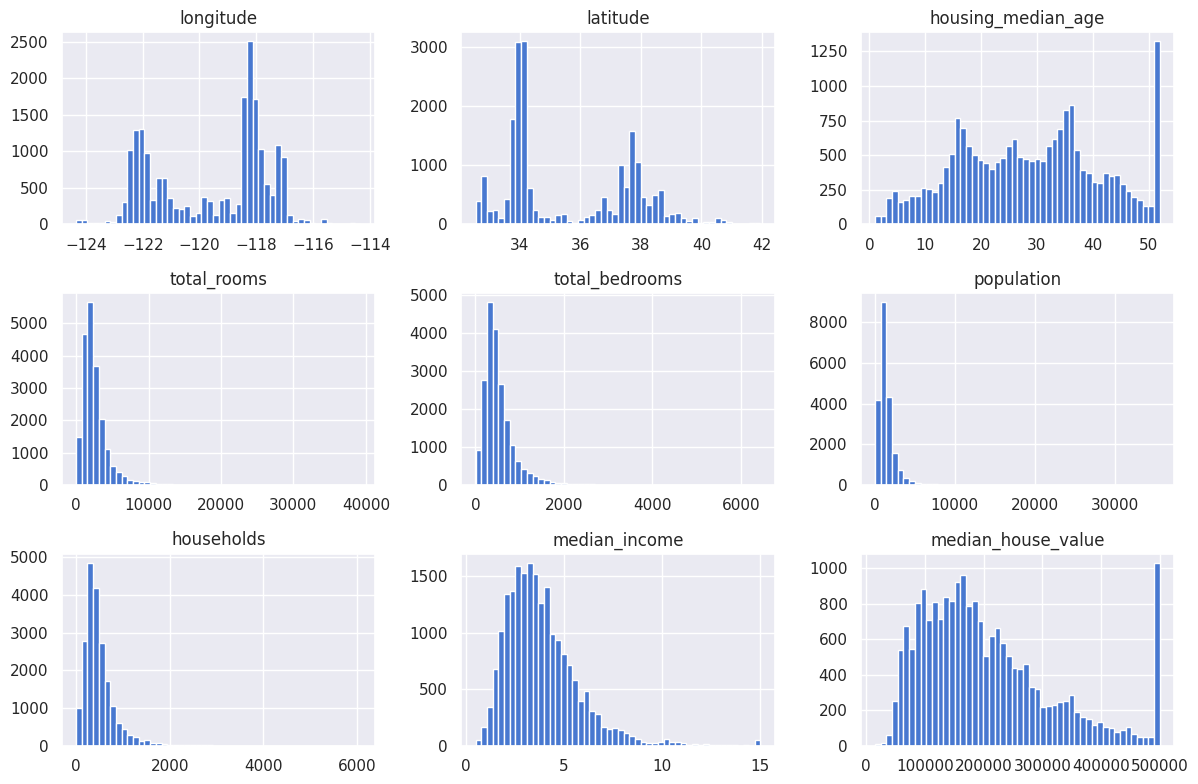

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='muted', font_scale=1)

df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

Based on the histograms, several of the variables appear to be right skewed. To confirm the presence of skewness, exact values of skew will be calculated using the `skew()` method.

In [7]:
key_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

df[key_variables].skew()

housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
dtype: float64

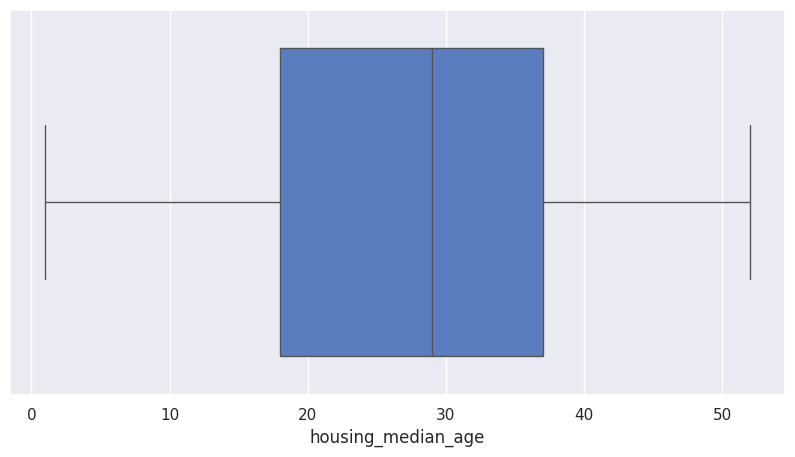

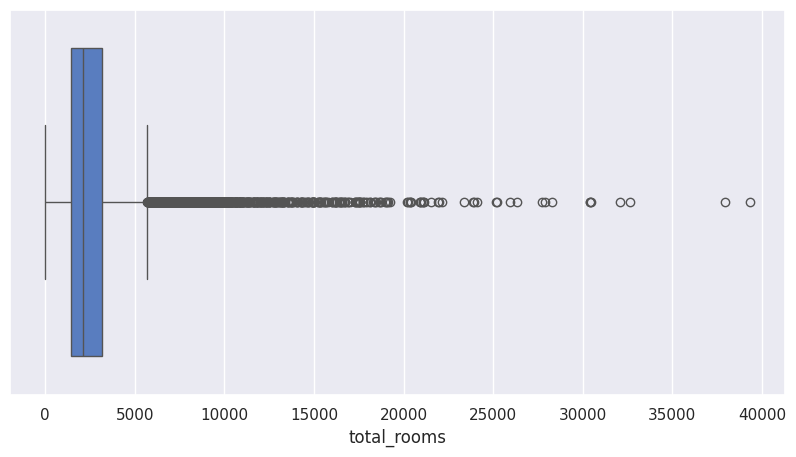

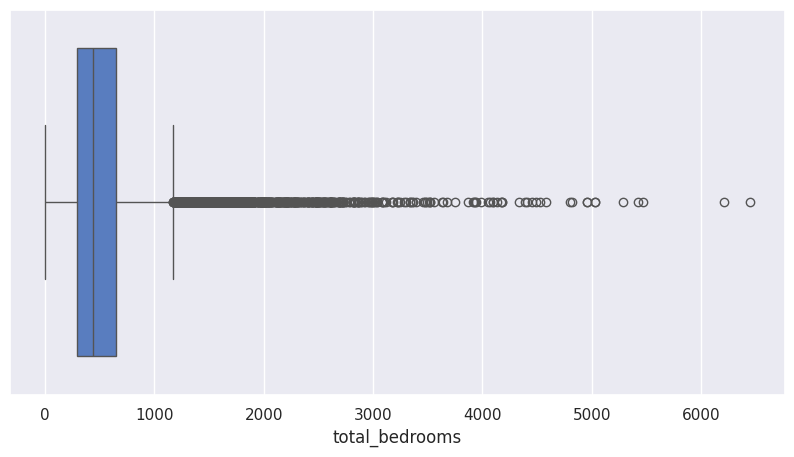

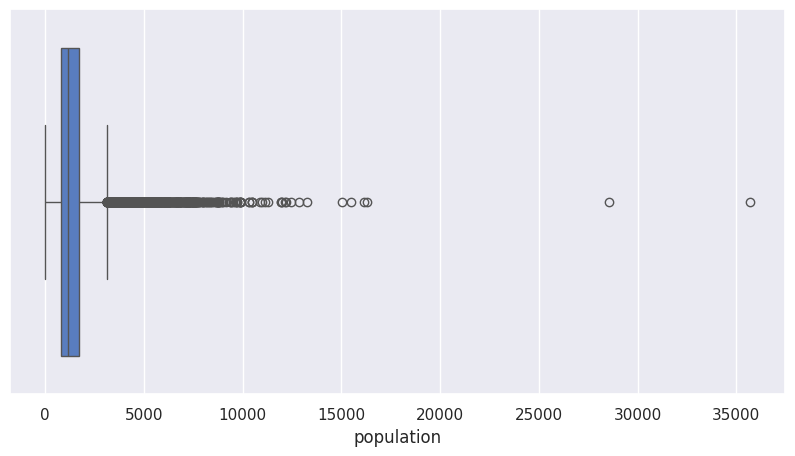

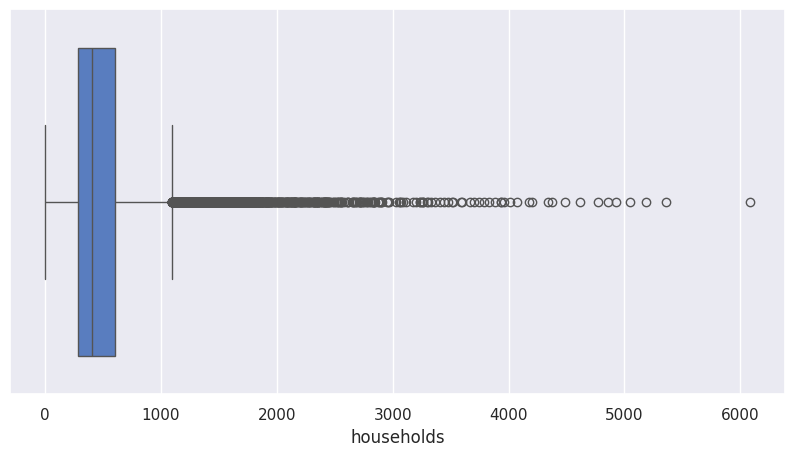

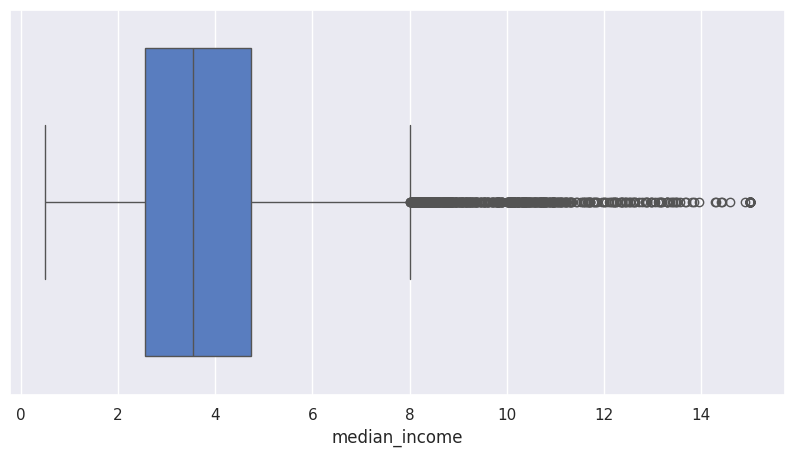

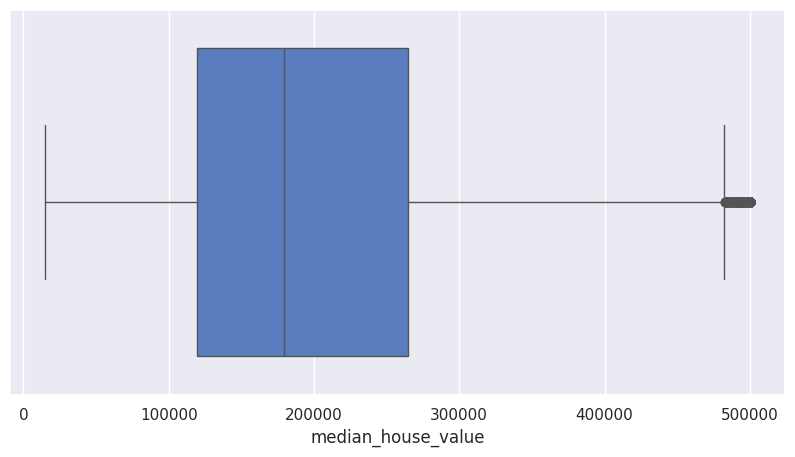

In [8]:
import numpy as np

# Create boxplots for numeric variables
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns = numeric_columns.drop(['longitude', 'latitude'], axis=1)

for variable in numeric_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=numeric_columns, x=variable)
    plt.show()

The boxplots of the features indicate that there are multiple outliers in most features. Given California's size and variety of wealth concentration and population density, this was expected. To mitigate the effects of outliers, L2 regularization will be utilized in the models.

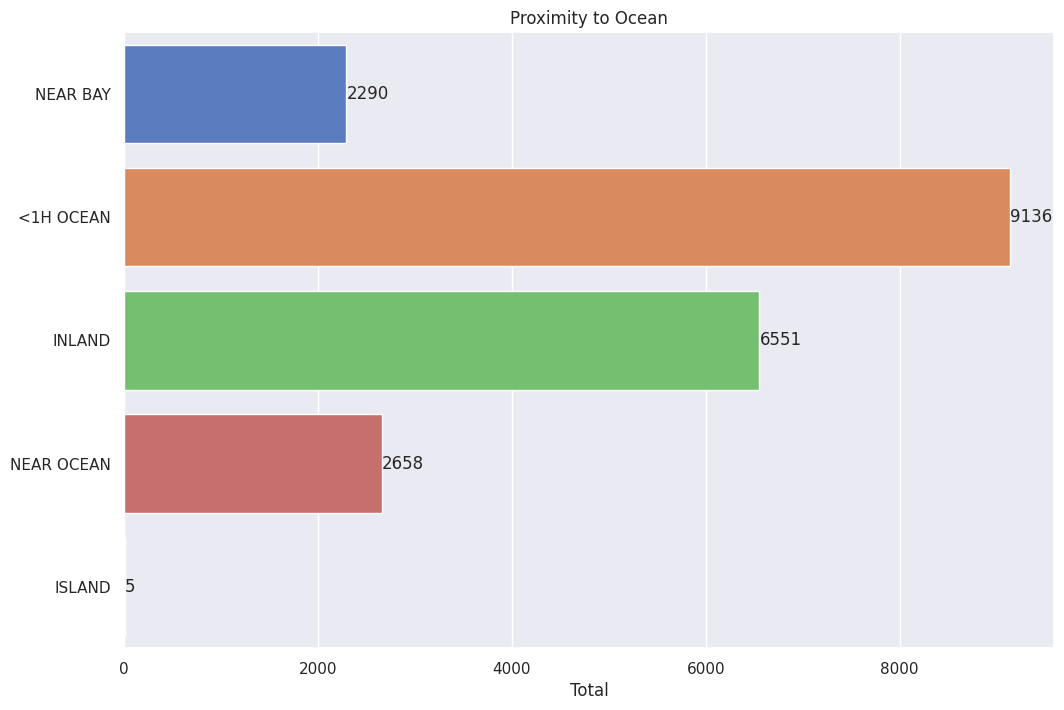

In [9]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, y='ocean_proximity', hue='ocean_proximity')
plt.ylabel('')
plt.xlabel('Total')
plt.title('Proximity to Ocean')

for p in ax.patches:
    # Calculate annotation text location and value
    x = p.get_x() + p.get_width() + 5
    y = p.get_y() + p.get_height() / 2
    value = int(p.get_width())

    # Add annotation text to the plot
    ax.text(x, y, value, va='center')  # 'va' is vertical alignment

plt.show()

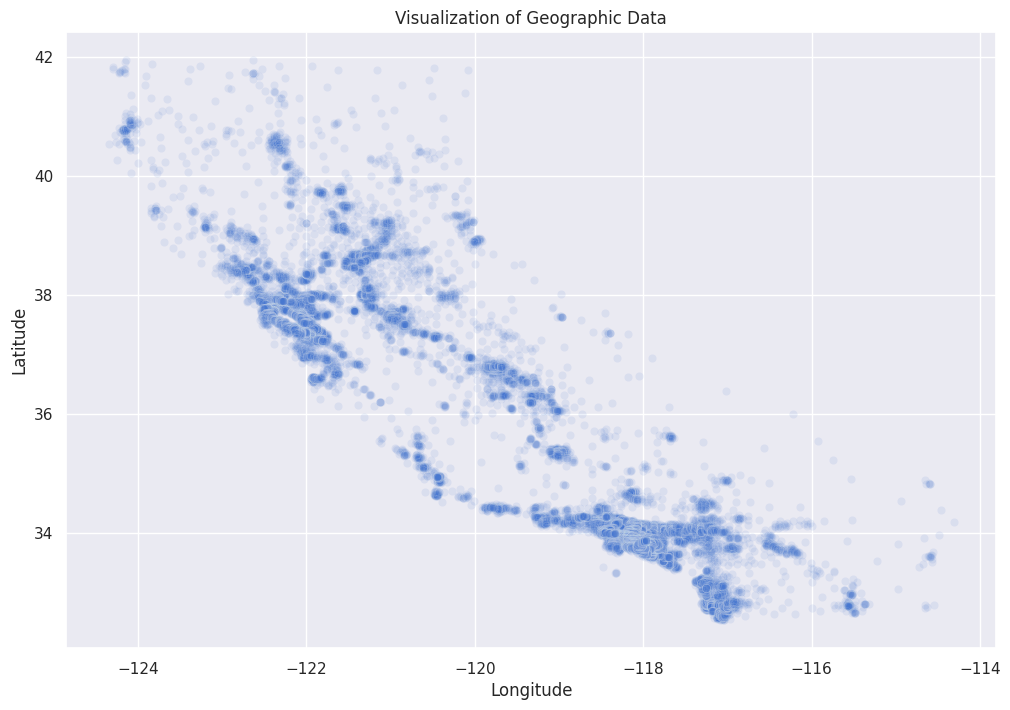

In [10]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualization of Geographic Data')
plt.show()

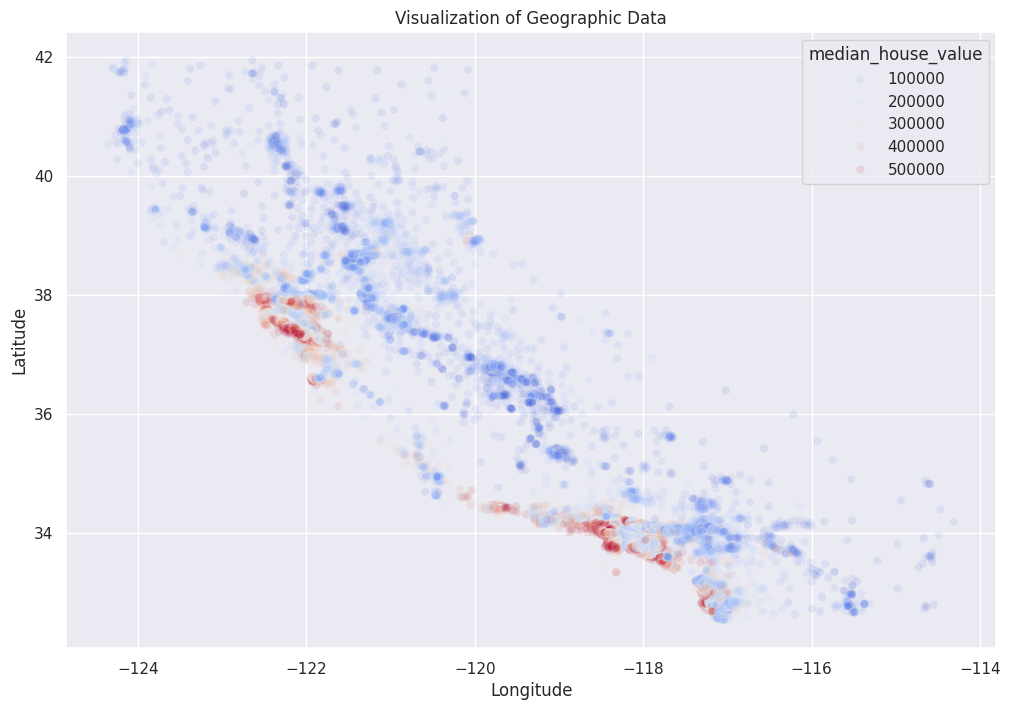

In [11]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualization of Geographic Data')
plt.show()

The visualization looks similar to the state of California. With alpha set to 0.1, the areas with denser populations become apparent. Specifically, there appears to be dense populations in the areas where San Diego, Los Angeles, and San Fransisco are located. Additionally, it appears more people live along the coast compared to the eastern border of the state. Unsurprisingly, the most expensive homes are in the San Diego, Los Angeles, San Fransisco, and coastal areas.

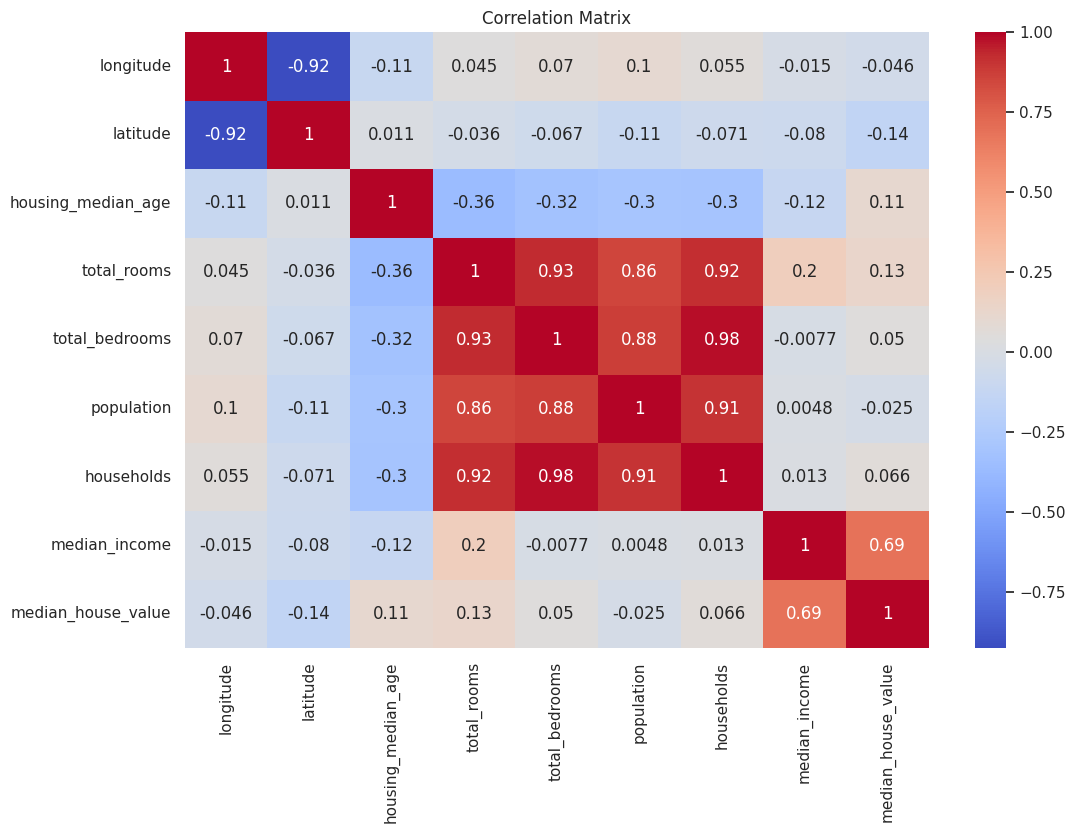

In [12]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The `.corr()` method was used to calculate the Pearson correlation coefficient between the variables in the dataset. Analysis of longitude and latitude were omitted as their values are different from the other variables in the dataset.

The following variables pairs were observed to have a strong (0.60 - 0.79) or very strong (0.80 - 1.00) correlations:
- total_rooms x total_bedrooms
- total_rooms x population
- total_rooms x households
- total_bedrooms x population
- total_bedrooms x households
- population x households
- median_income x median_house_value

To mitigate the effects of the correlations, regularization will be used in the models.


# Prepare the Data

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=8)

In [14]:
X_train = train.drop(['median_house_value', 'ocean_proximity'], axis=1)

# Separate the categorical variable from the features to simplify data preparation
train_cat = train['ocean_proximity'].copy()
y_train = train['median_house_value'].copy()

X_test = test.drop(['median_house_value', 'ocean_proximity'], axis=1)
test_cat = test['ocean_proximity'].copy()
y_test = test['median_house_value'].copy()

### Address Missing Values

In [15]:
column = 'total_bedrooms'

train_median_value = X_train[column].median()

# Fill NaN values in the column with the calculated median
X_train[column] = X_train[column].fillna(train_median_value)
X_test[column] = X_test[column].fillna(train_median_value) # train_median_value used toprevent data leakage

### Transforming the Data

The formula for standardizing a data point within a feature is given by:

$$ \frac{x - \mu}{\sigma} $$

Where x is the specific data point in the feature, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.

Standardization was chosen for the following reasons:
- Facilitation of the learning process
- Avoidance of vanishing/exploding gradients
- Maintenance of inputs within the active range for the ReLU activation function
- Promote consistency across features
- Increase the likeliness of generalization across different models
- Adherence to common conventions in machine learning

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # Scaler is fitted only on training data to avoid data leakage

In [17]:
# Convert data into a dataframe
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [18]:
X_train_df = pd.DataFrame(X_train_df)
X_test_df = pd.DataFrame(X_test_df)

### One Hot Encoding Categorical Variable

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
cat_encoder = OneHotEncoder()

# Reshape the train_cat if it's a 1D array (e.g., pandas Series)
train_cat_reshaped = train_cat.values.reshape(-1, 1) if train_cat.ndim == 1 else train_cat

# Fit the encoder on the training categorical data
cat_encoder.fit(train_cat_reshaped)

# Transform the training and test categorical data
train_cat_1hot = cat_encoder.transform(train_cat_reshaped)
test_cat_reshaped = test_cat.values.reshape(-1, 1) if test_cat.ndim == 1 else test_cat
test_cat_1hot = cat_encoder.transform(test_cat_reshaped)


### Convert Data to Correct Format

In [20]:
# Convert the sparse matrix to a dense matrix
train_cat_1hot_dense = train_cat_1hot.toarray()
test_cat_1hot_dense = test_cat_1hot.toarray()

# Get the list of categories for naming the DataFrame columns
categories = cat_encoder.get_feature_names_out()

# Create the DataFrame
train_cat_1hot_df = pd.DataFrame(train_cat_1hot_dense, columns=categories)
test_cat_1hot_df = pd.DataFrame(test_cat_1hot_dense, columns=categories)

In [21]:
# Reset indices to ensure alignment
X_train_df.reset_index(drop=True, inplace=True)
train_cat_1hot_df.reset_index(drop=True, inplace=True)

# Concatenate train data
X_train_final = pd.concat([X_train_df, train_cat_1hot_df], axis=1)


In [22]:
# Reset indices to ensure alignment
X_test_df.reset_index(drop=True, inplace=True)
test_cat_1hot_df.reset_index(drop=True, inplace=True)

# Concatenate test data
X_test_final = pd.concat([X_test_df, test_cat_1hot_df], axis=1)


In [23]:
# Convert dataframes to NumPy arrays
X_train_numpy = X_train_final.values
X_test_numpy = X_test_final.values

y_train_numpy = y_train.values
y_test_numpy = y_test.values

In [24]:
# Create validation set
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(X_train_numpy, y_train_numpy, test_size=0.2, random_state=23)

# Build the Models

Three neural networks were created to build a model capable of predicting housing prices accurately. The number of layers and neurons and L2 regularization level were determined through trial and error. Initial values for the hyperparameters were based on previous models examining a similar topic.

The models were evaluated using root mean square error (RMSE) on the training and validation sets and R-squared on the validation set.

After selecting one of the three models, the L2 hyperparameter was optimized.

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# Set early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

## Model 1

In [27]:
# Set L2 regularization level
l2_reg = 0.08

nn_model = keras.Sequential([
    layers.Input(shape=(X_train_final.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers. Adam(learning_rate=0.02)
nn_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['RootMeanSquaredError'])

In [28]:
history = nn_model.fit(X_train_np,
                       y_train_np,
                       epochs=500,
                       batch_size=32,
                       validation_data=(X_val_np, y_val_np),
                       callbacks=[early_stopping])

Epoch 1/500
413/413 [==============================] - 2s 3ms/step - loss: 24989495296.0000 - root_mean_squared_error: 158080.6562 - val_loss: 5989275648.0000 - val_root_mean_squared_error: 77390.3984
Epoch 2/500
413/413 [==============================] - 1s 2ms/step - loss: 5127696384.0000 - root_mean_squared_error: 71607.9219 - val_loss: 4868782592.0000 - val_root_mean_squared_error: 69776.6484
Epoch 3/500
413/413 [==============================] - 1s 2ms/step - loss: 4716051968.0000 - root_mean_squared_error: 68673.5078 - val_loss: 4733312512.0000 - val_root_mean_squared_error: 68799.0547
Epoch 4/500
413/413 [==============================] - 1s 2ms/step - loss: 4625490944.0000 - root_mean_squared_error: 68010.9453 - val_loss: 4679412736.0000 - val_root_mean_squared_error: 68406.2109
Epoch 5/500
413/413 [==============================] - 1s 2ms/step - loss: 4572772864.0000 - root_mean_squared_error: 67622.2656 - val_loss: 4616327680.0000 - val_root_mean_squared_error: 67943.5469
Epo

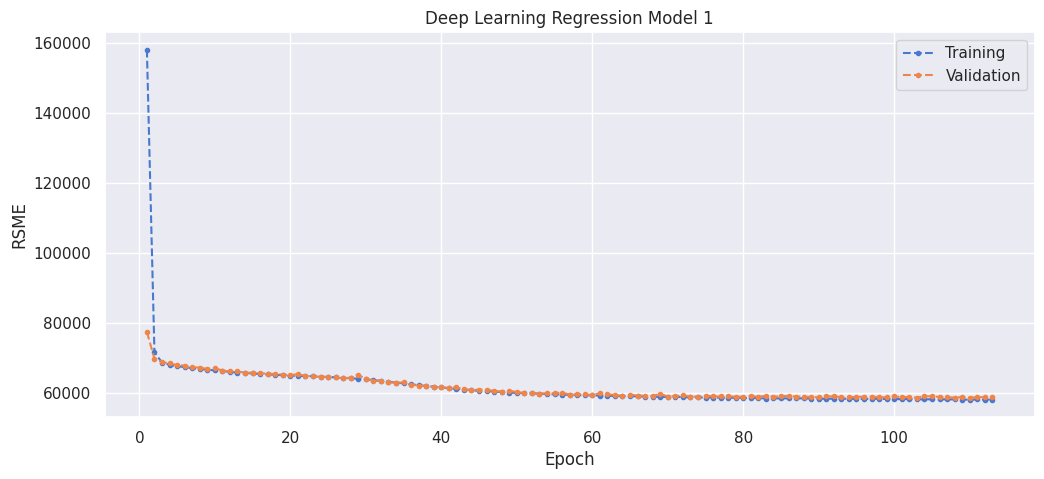

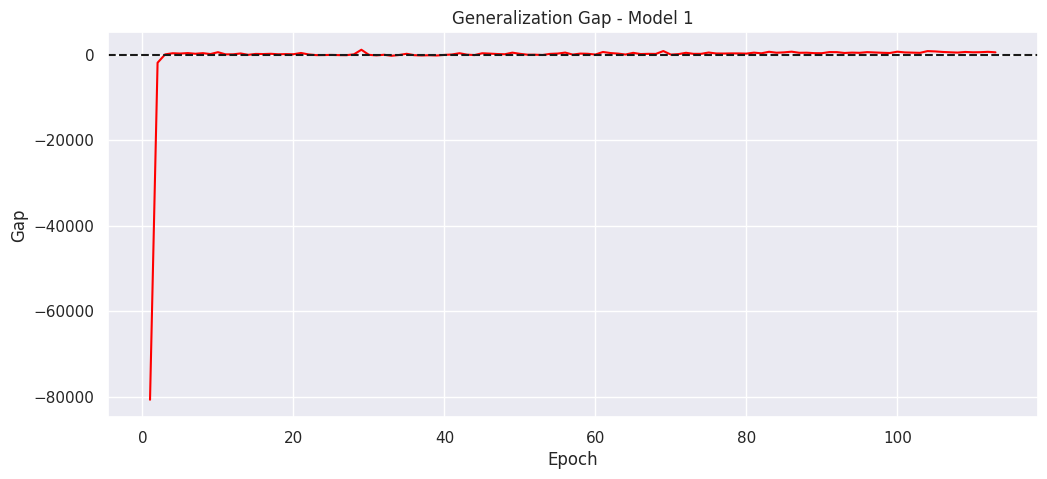

In [29]:
training_rsme = history.history['root_mean_squared_error']
val_rsme = history.history['val_root_mean_squared_error']
best_epoch = (early_stopping.stopped_epoch - early_stopping.patience) + 1

gen_gap = []
for i in list(range(len(val_rsme))):
    gap = val_rsme[i] - training_rsme[i]
    gen_gap.append(gap)

epochs = list(range(1, len(val_rsme) + 1))

plt.figure(figsize=(12, 5))

plt.plot(epochs, training_rsme, '--.', label='Training')
plt.plot(epochs, val_rsme, '--.', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('RSME')
plt.title('Deep Learning Regression Model 1')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))

plt.plot(epochs, gen_gap, color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Gap')
plt.title('Generalization Gap - Model 1')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the training set and the validation set
train_predictions = nn_model.predict(X_train_np)
val_predictions = nn_model.predict(X_val_np)

# Calculate the training and validation MSE
train_mse = mean_squared_error(y_train_np, train_predictions)
val_mse = mean_squared_error(y_val_np, val_predictions)

nn1_train_rmse = np.sqrt(train_mse)
nn1_val_rmse = np.sqrt(val_mse)
nn1_val_r_sq = r2_score(y_val_np, val_predictions)

print(f"Training RMSE: {nn1_train_rmse}")
print(f"Validation RMSE: {nn1_val_rmse}")
print(f"Validation R-squared: {nn1_val_r_sq}")

104/104 [==============================] - 0s 2ms/step
Training RMSE: 57819.13876197228
Validation RMSE: 58624.784769828846
Validation R-squared: 0.7386645282036093


The initial model had an initial training RMSE of $158,080, which is relatively high. One potential explanation for this occurrence is improper kernel initialization; therefore, the 'he_normal' initializer was used on the second model.

## Model 2

In [47]:
l2_reg = 0.08

nn_model2 = keras.Sequential([
    layers.Input(shape=(X_train_final.shape[1],)),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(1)
])

optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.02)
nn_model2.compile(loss='mean_squared_error', optimizer=optimizer2, metrics=['RootMeanSquaredError'])

In [48]:
history = nn_model2.fit(X_train_np,
                       y_train_np,
                       epochs=500,
                       batch_size=32,
                       validation_data=(X_val_np, y_val_np),
                       callbacks=[early_stopping])

Epoch 1/500
413/413 [==============================] - 2s 2ms/step - loss: 22322884608.0000 - root_mean_squared_error: 149408.4531 - val_loss: 5607088128.0000 - val_root_mean_squared_error: 74880.4688
Epoch 2/500
413/413 [==============================] - 1s 2ms/step - loss: 4959633408.0000 - root_mean_squared_error: 70424.6562 - val_loss: 4820616192.0000 - val_root_mean_squared_error: 69430.6406
Epoch 3/500
413/413 [==============================] - 1s 2ms/step - loss: 4668393472.0000 - root_mean_squared_error: 68325.6172 - val_loss: 4722183168.0000 - val_root_mean_squared_error: 68718.1328
Epoch 4/500
413/413 [==============================] - 1s 2ms/step - loss: 4594113024.0000 - root_mean_squared_error: 67779.8750 - val_loss: 4643968512.0000 - val_root_mean_squared_error: 68146.6562
Epoch 5/500
413/413 [==============================] - 1s 3ms/step - loss: 4540346880.0000 - root_mean_squared_error: 67382.0781 - val_loss: 4602779648.0000 - val_root_mean_squared_error: 67843.7734
Epo

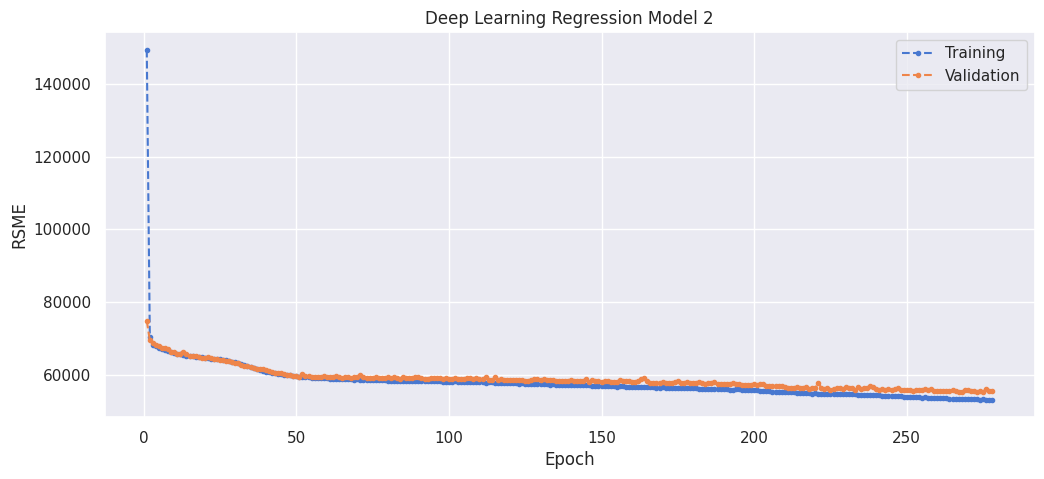

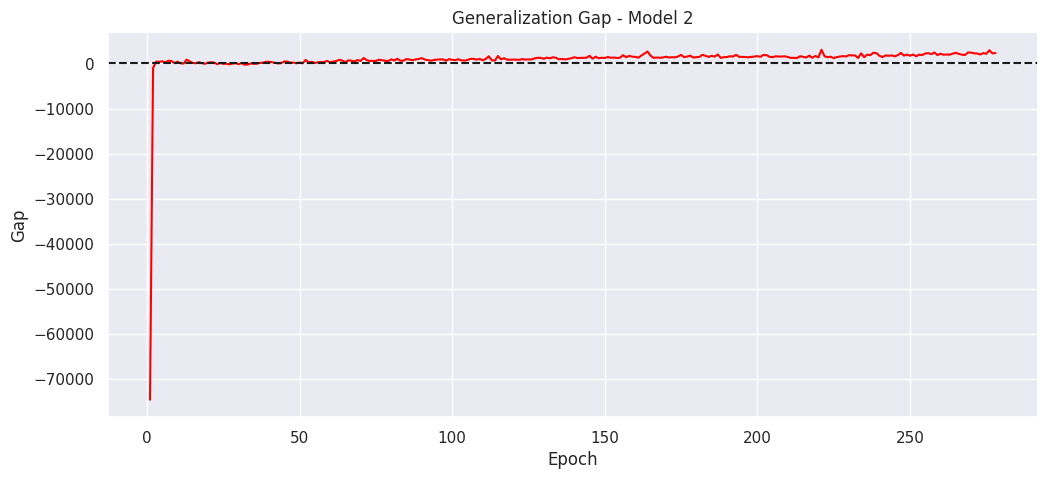

In [49]:
training_rsme = history.history['root_mean_squared_error']
val_rsme = history.history['val_root_mean_squared_error']
best_epoch = (early_stopping.stopped_epoch - early_stopping.patience) + 1

gen_gap = []
for i in list(range(len(val_rsme))):
    gap = val_rsme[i] - training_rsme[i]
    gen_gap.append(gap)

epochs = list(range(1, len(val_rsme) + 1))

plt.figure(figsize=(12, 5))

plt.plot(epochs, training_rsme, '--.', label='Training')
plt.plot(epochs, val_rsme, '--.', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('RSME')
plt.title('Deep Learning Regression Model 2')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))

plt.plot(epochs, gen_gap, color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Gap')
plt.title('Generalization Gap - Model 2')
plt.show()

In [50]:
# Predict on the training set and the validation set
train_predictions = nn_model2.predict(X_train_np)
val_predictions = nn_model2.predict(X_val_np)

# Calculate the training and validation MSE
train_mse = mean_squared_error(y_train_np, train_predictions)
val_mse = mean_squared_error(y_val_np, val_predictions)

nn2_train_rmse = np.sqrt(train_mse)
nn2_val_rmse = np.sqrt(val_mse)
nn2_val_r_sq = r2_score(y_val_np, val_predictions)

print(f"Training RMSE: {nn2_train_rmse}")
print(f"Validation RMSE: {nn2_val_rmse}")
print(f"Validation R-squared: {nn2_val_r_sq}")

104/104 [==============================] - 0s 1ms/step
Training RMSE: 52934.87140742512
Validation RMSE: 55296.666946737845
Validation R-squared: 0.7674942228599743


The initial training RMSE for Model 2 was 149,408, which is a slight improvement from Model 1. Additionally, improvements in training RMSE, validation RMSE, and validation R-squared were observed. To determine if a more complex model would produce better results, the number of layers and neurons of the third model were increased. To avoid overfitting, the L2 regulaization level was also increased.

## Model 3

In [51]:
# Increase L2 regularization level to account for increased complexity
l2_reg = 0.2

nn_model3 = keras.Sequential([
    layers.Input(shape=(X_train_final.shape[1],)),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(1)
])

optimizer3 = tf.keras.optimizers.Adam(learning_rate=0.05)
nn_model3.compile(loss='mean_squared_error', optimizer=optimizer3, metrics=['RootMeanSquaredError'])

In [52]:
history = nn_model3.fit(X_train_np,
                       y_train_np,
                       epochs=500,
                       batch_size=32,
                       validation_data=(X_val_np, y_val_np),
                       callbacks=[early_stopping])

Epoch 1/500
413/413 [==============================] - 2s 3ms/step - loss: 7306622464.0000 - root_mean_squared_error: 85478.7656 - val_loss: 4793129984.0000 - val_root_mean_squared_error: 69232.4219
Epoch 2/500
413/413 [==============================] - 1s 2ms/step - loss: 4558067200.0000 - root_mean_squared_error: 67513.4453 - val_loss: 4775981056.0000 - val_root_mean_squared_error: 69108.4531
Epoch 3/500
413/413 [==============================] - 1s 2ms/step - loss: 4437635072.0000 - root_mean_squared_error: 66615.5625 - val_loss: 4169299456.0000 - val_root_mean_squared_error: 64570.0859
Epoch 4/500
413/413 [==============================] - 1s 2ms/step - loss: 4374988800.0000 - root_mean_squared_error: 66143.6719 - val_loss: 4088620288.0000 - val_root_mean_squared_error: 63942.2969
Epoch 5/500
413/413 [==============================] - 1s 2ms/step - loss: 4210561024.0000 - root_mean_squared_error: 64888.8164 - val_loss: 4046733312.0000 - val_root_mean_squared_error: 63613.9180
Epoch

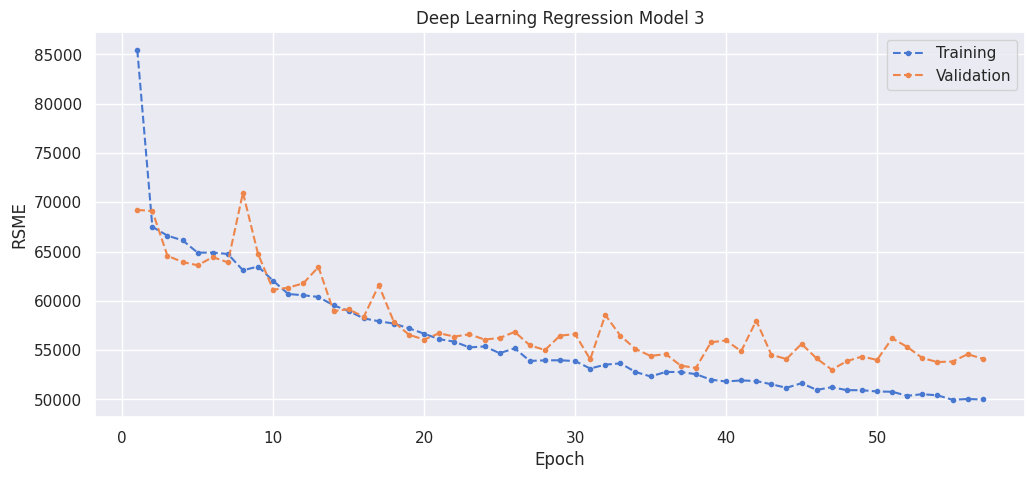

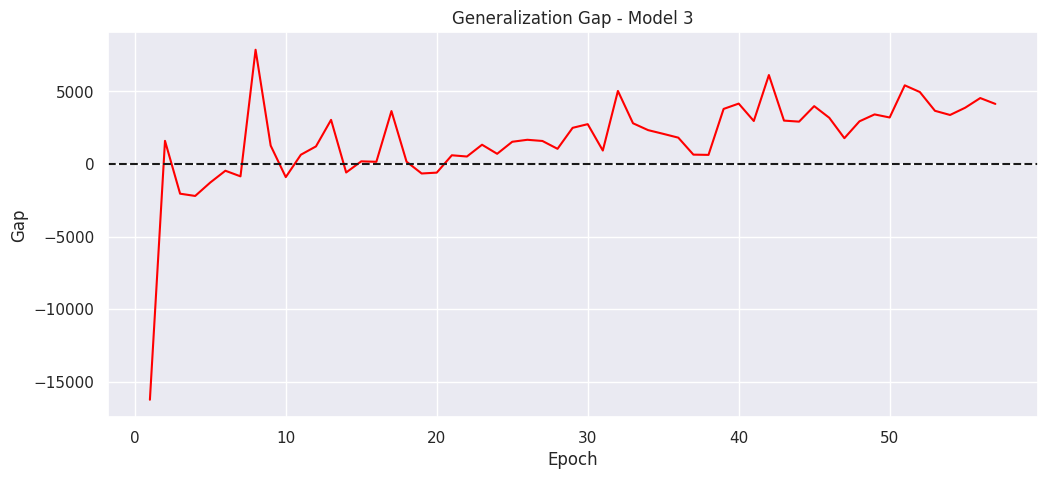

In [53]:
training_rsme = history.history['root_mean_squared_error']
val_rsme = history.history['val_root_mean_squared_error']
best_epoch = (early_stopping.stopped_epoch - early_stopping.patience) + 1

gen_gap = []
for i in list(range(len(val_rsme))):
    gap = val_rsme[i] - training_rsme[i]
    gen_gap.append(gap)

epochs = list(range(1, len(val_rsme) + 1))

plt.figure(figsize=(12, 5))

plt.plot(epochs, training_rsme, '--.', label='Training')
plt.plot(epochs, val_rsme, '--.', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('RSME')
plt.title('Deep Learning Regression Model 3')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))

plt.plot(epochs, gen_gap, color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Gap')
plt.title('Generalization Gap - Model 3')
plt.show()

In [54]:
# Predict on the training set and the validation set
train_predictions = nn_model3.predict(X_train_np)
val_predictions = nn_model3.predict(X_val_np)

# Calculate the training and validation MSE
train_mse = mean_squared_error(y_train_np, train_predictions)
val_mse = mean_squared_error(y_val_np, val_predictions)

nn3_train_rmse = np.sqrt(train_mse)
nn3_val_rmse = np.sqrt(val_mse)
nn3_val_r_sq = r2_score(y_val_np, val_predictions)

print(f"Training RMSE: {nn3_train_rmse}")
print(f"Validation RMSE: {nn3_val_rmse}")
print(f"Validation R-squared: {nn3_val_r_sq}")

104/104 [==============================] - 0s 1ms/step
Training RMSE: 49797.81120334301
Validation RMSE: 53021.72405763641
Validation R-squared: 0.7862315887665927


## Summary of Models

In [62]:
models = ['Model 1', 'Model 2', 'Model 3']
tr_RMSE = [nn1_train_rmse, nn2_train_rmse, nn3_train_rmse]
val_RMSE = [nn1_val_rmse, nn2_val_rmse, nn3_val_rmse]
val_r_squared = [nn1_val_r_sq, nn2_val_r_sq, nn3_val_r_sq]
epochs = [113, 278, 57]

summary_df = pd.DataFrame(zip(models, tr_RMSE, val_RMSE, val_r_squared, epochs), columns=['Model', 'Tr. RMSE', 'Val. RMSE', 'Val. R-sq', 'Epochs'])

In [63]:
from tabulate import tabulate

# Convert DataFrame to a table
print(tabulate(summary_df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------+-------------+----------+
|    | Model   |   Tr. RMSE |   Val. RMSE |   Val. R-sq |   Epochs |
+====+=========+============+=============+=============+==========+
|  0 | Model 1 |    57819.1 |     58624.8 |    0.738665 |      113 |
+----+---------+------------+-------------+-------------+----------+
|  1 | Model 2 |    52934.9 |     55296.7 |    0.767494 |      278 |
+----+---------+------------+-------------+-------------+----------+
|  2 | Model 3 |    49797.8 |     53021.7 |    0.786232 |       57 |
+----+---------+------------+-------------+-------------+----------+


Model 3 was selected as the best model for the following reasons:
- Lowest training and validation RMSE
- Highest validation r-squared score
- Trained using the fewest epochs

# Optimizing Hyperparameters

In [57]:
from tensorflow import keras

def create_model(l2_reg=0.01):
    nn_model3 = keras.Sequential([
    layers.Input(shape=(X_train_final.shape[1],)),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dense(1)
    ])

    optimizer3 = tf.keras.optimizers.Adam(learning_rate=0.05)
    nn_model3.compile(loss='mean_squared_error', optimizer=optimizer3, metrics=['RootMeanSquaredError'])
    return nn_model3

l2_values = [0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.30]
validation_scores = list()

for l2_reg in l2_values:
    model = create_model(l2_reg=l2_reg)
    history = model.fit(X_train_np, y_train_np, epochs=10, batch_size=32, validation_data=(X_val_np, y_val_np), verbose=0)

    min_val_loss = min(history.history['val_loss'])
    validation_scores.append(min_val_loss)

    print(f'L2 Value: {l2_reg}, Min Validation Loss: {min_val_loss}')

L2 Value: 0.18, Min Validation Loss: 3948856320.0
L2 Value: 0.2, Min Validation Loss: 3751999232.0
L2 Value: 0.22, Min Validation Loss: 3775559936.0
L2 Value: 0.24, Min Validation Loss: 3687520768.0
L2 Value: 0.26, Min Validation Loss: 4088571392.0
L2 Value: 0.28, Min Validation Loss: 3919032320.0
L2 Value: 0.3, Min Validation Loss: 3978041856.0


In [58]:
best_index = np.argmin(validation_scores)
best_l2_value = l2_values[best_index]
print(f'Best L2 Regularization Value: {best_l2_value}')

Best L2 Regularization Value: 0.24


In [59]:
best_model = create_model(l2_reg=best_l2_value)
best_model.fit(X_train_np,
               y_train_np,
               epochs=500,
               batch_size=32,
               verbose=1,
               validation_data=(X_val_np, y_val_np),
               callbacks=[early_stopping])

Epoch 1/500
413/413 [==============================] - 2s 3ms/step - loss: 7374551040.0000 - root_mean_squared_error: 85875.1953 - val_loss: 4625830400.0000 - val_root_mean_squared_error: 68013.4453
Epoch 2/500
413/413 [==============================] - 1s 2ms/step - loss: 4620137472.0000 - root_mean_squared_error: 67971.5781 - val_loss: 4309636096.0000 - val_root_mean_squared_error: 65647.8125
Epoch 3/500
413/413 [==============================] - 1s 2ms/step - loss: 4663020032.0000 - root_mean_squared_error: 68286.2891 - val_loss: 4477266944.0000 - val_root_mean_squared_error: 66912.3594
Epoch 4/500
413/413 [==============================] - 1s 2ms/step - loss: 4434694656.0000 - root_mean_squared_error: 66593.4922 - val_loss: 4656222720.0000 - val_root_mean_squared_error: 68236.4922
Epoch 5/500
413/413 [==============================] - 1s 2ms/step - loss: 4333646848.0000 - root_mean_squared_error: 65830.4062 - val_loss: 4327637504.0000 - val_root_mean_squared_error: 65784.7500
Epoch

## Performance on Test Set

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

test_predictions = best_model.predict(X_test_numpy)

# Calculate the training and validation MSE
test_mse = mean_squared_error(y_test_numpy, test_predictions)

test_rmse = np.sqrt(test_mse)
nrmse_range = (test_rmse / (y_test_numpy.max() - y_test_numpy.min())) * 100
test_r_sq = r2_score(y_test_numpy, test_predictions)


print(f"Test RMSE: {test_rmse}")
print(f'Normalized Test RMSE: {nrmse_range}')
print(f"Test R-squared: {test_r_sq}")

129/129 [==============================] - 0s 2ms/step
Test RMSE: 51707.649719278226
Normalized Test RMSE: 10.661327111904328
Test R-squared: 0.7963263661080352


Model 3 using a L2 regulaization level of 0.24 was used to evaluate the test set. Root mean square error, normalized RMSE, and the coefficient of determination (i.e., $R^2$) were used to quantify the model's performance. The scores for each metric are presented in the table below.

In [61]:
metric = ['RMSE', 'Normalized RMSE', 'R-squared']
score = [test_rmse, nrmse_range, test_r_sq]

test_metrics = pd.DataFrame(zip(metric, score), columns=['Metric', 'Score'])

print(tabulate(test_metrics, headers='keys', tablefmt='grid'))

+----+-----------------+--------------+
|    | Metric          |        Score |
+====+=================+==============+
|  0 | RMSE            | 51707.6      |
+----+-----------------+--------------+
|  1 | Normalized RMSE |    10.6613   |
+----+-----------------+--------------+
|  2 | R-squared       |     0.796326 |
+----+-----------------+--------------+


# Conclusion

The goal RMSE of approximately $50,000 was met through the best model. To provide another evaluation of the model, the normalized RMSE by range of the data was calculated with the following formula:

$$ \frac{RMSE}{max(y) - min(y)} $$

The normalized RMSE (NRMSE) is a standardized version of RMSE that is scale-independent. It is expressed as a fraction or percentage, which often makes it easier to interpret compared to RMSE. The NRMSE of the best model was near 10%, which places it in the acceptable range for many applications, especially those working with noisy data. Given the size of California and its concentrated areas of wealth and poverty and the number of outliers in the dataset, the NRMSE provides additional evidence for the utility of the model.

Although the results of the model were encouraging, there are some limitations that should be addressed in future iterations of the project. First, there were some strong to very strong correlations between features. The current model addressed the correlations through the use of L2 regularization; however, another approach, like dimension reduction, may have produced better results. Second, there were several outliers in the dataset, which may have impacted the performance of the model. Similar to the first limitation, the effects of the outliers were mitigated through the use of L2 regularization. However, another approach may have yielded improved performance. Third, the learning rate of the final model was not optimized, which could have led to sub-optimal performance.

Overall, the final model appears well-suited to aid real estate professionals in suggesting or evaluating home prices in California.

# References

Géron, A. (2021). *Hands-on machine learning with scikit-learn, keras & tensorflow: Concepts, tools, and techniques to build intelligent systems*. O'Reilly Press.

Goodfellow, I., Bengio, Y., and Courville, A. (2016). *Deep learning*. MIT Press.

He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In *Proceedings of the IEEE conference on computer vision and pattern recognition* https://arxiv.org/abs/1512.03385

Yazdani, M. (2021). Machine learning,  deep learning, and hedonic methods for real estate price prediction. *Econometrics*. https://arxiv.org/abs/2110.07151